In [68]:
# Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score # new library
from sklearn.model_selection import GridSearchCV # new library
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error 
import warnings 
warnings.filterwarnings('ignore') 

In [69]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
df.shape # show shape dataset

(50, 5)

# **Data Profiling**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [72]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# **Exploratory Data Analys**

In [73]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


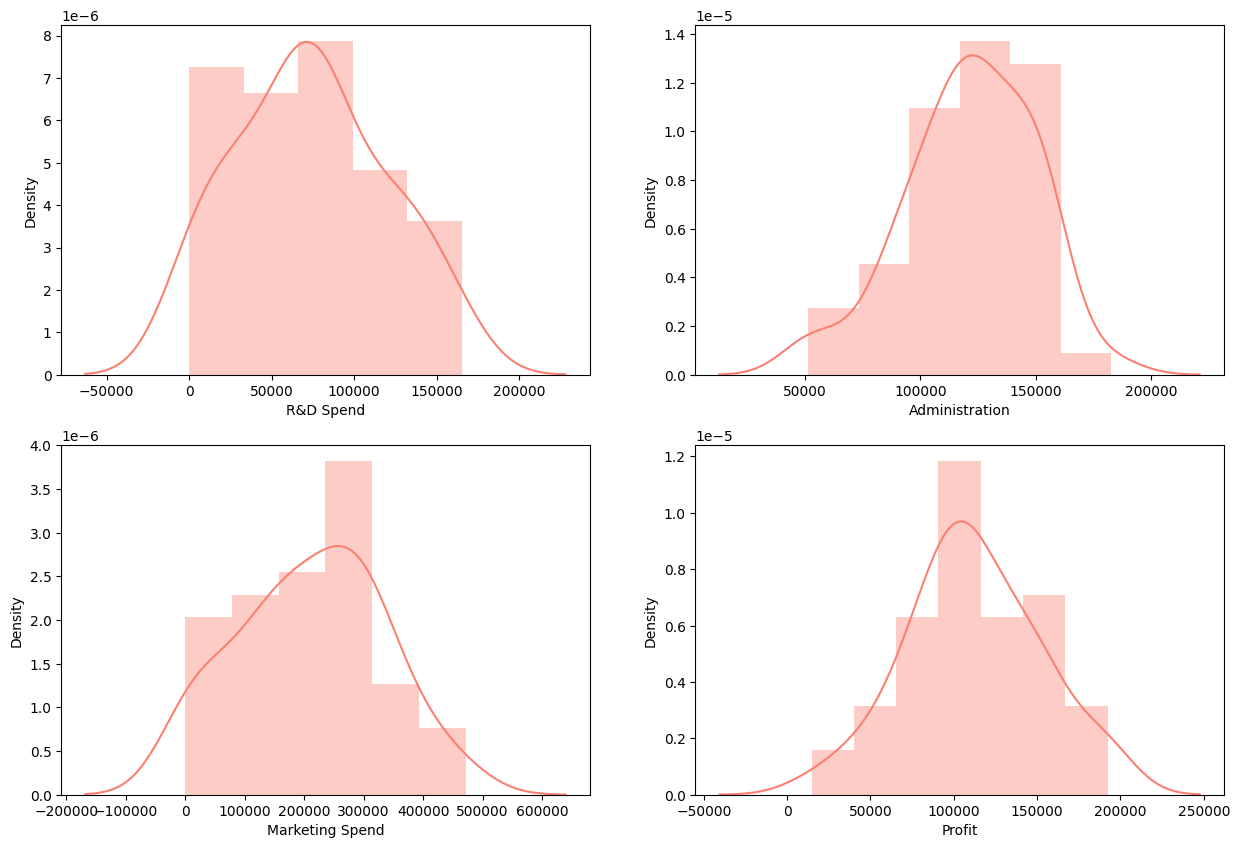

In [74]:
col = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
features = col
plt.figure(figsize=(15, 10))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.distplot(x=df[features[i]], color='salmon')
    plt.xlabel(features[i]);

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<AxesSubplot: >

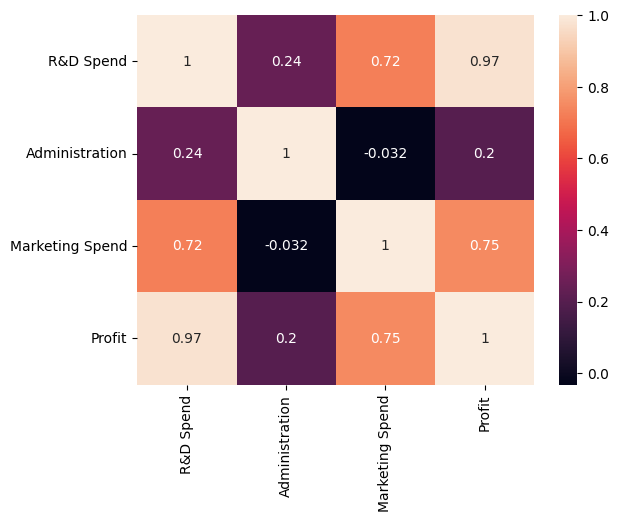

In [75]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)

# **Feature Engineering**

In [76]:
# df['State'].value_counts()

In [77]:
state_enc = pd.get_dummies(df['State'], prefix = 'State')
df.drop(['State'], axis=1, inplace = True)
df = pd.concat([df, state_enc], axis=1)

In [78]:
scaler = StandardScaler()
df[['R&D Spend']] = scaler.fit_transform(df[['R&D Spend']])
df[['Administration']] = scaler.fit_transform(df[['Administration']])
df[['Marketing Spend']] = scaler.fit_transform(df[['Marketing Spend']])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,2.016411,0.560753,2.153943,192261.83,0,0,1
1,1.955860,1.082807,1.923600,191792.06,1,0,0
2,1.754364,-0.728257,1.626528,191050.39,0,1,0
3,1.554784,-0.096365,1.422210,182901.99,0,0,1
4,1.504937,-1.079919,1.281528,166187.94,0,1,0


# **Model Preprocessing**

In [79]:
df.drop(['Marketing Spend', 'R&D Spend'], axis=1,inplace = True)

In [80]:
x = df.drop(['Profit'], axis=1)
y = df['Profit']


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=42)

# **Model Training**

In [82]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [83]:
importance = model.coef_

In [84]:
for i, v in enumerate(importance):
  print('Features %0d, Score : %.5f'%(i,v))

Features 0, Score : 917.23407
Features 1, Score : -10897.17334
Features 2, Score : 8045.54721
Features 3, Score : 2851.62613


# **Remodelling**

In [85]:
df.drop(['State_California', 'State_Florida','State_New York'], axis=1,inplace = True)

In [86]:
x = df.drop(['Profit'], axis=1)
y = df['Profit']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=42)

In [88]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

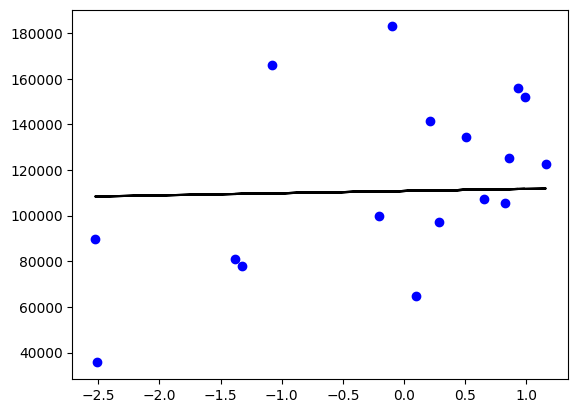

In [89]:
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')
  
plt.show()

In [90]:
mean_absolute_percentage_error(y_test, y_pred)

0.34839227351370355

# Hyperparameter Tuning and Evaluate Model

In [91]:
regressor = LinearRegression() # declare regressor variable
regressor.get_params() # getting default value from algoritm

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [92]:
# declare variable for parameter include possible value in every parameter
parameters = {
    "copy_X": [True, False],
    "fit_intercept": [True, False],
    "n_jobs": [None, -1],
    "normalize": [True, False],
    "positive": [True, False],
}

In [102]:
# getting grid with GridSearchCV function
grid = GridSearchCV(estimator=regressor , param_grid=parameters, cv=3)

In [103]:
# get best model for parameter that will use in Linear Regression
best_model = grid.fit(x_train, y_train)
best_model.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': True}

In [104]:
# fill algoritm with best model's parameter
regressor_new = LinearRegression(
    positive=True, 
    normalize=True, 
    n_jobs=None, 
    fit_intercept=True, 
    copy_X=True)

In [105]:
# create new model and new prediction with best model parameter
model_new = regressor_new.fit(x_train, y_train)
y_pred_new =regressor_new.predict(x_test)

In [107]:
# get MAPE
mape_new = mean_absolute_percentage_error(y_test, y_pred_new)
mape_new

0.3483922735137035